In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, r2_score
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('concrete_data.csv')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
df.shape

(1030, 9)

In [4]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [6]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
x = df.drop('Strength', axis=1)
y = df['Strength']

In [8]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=42)

In [9]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((721, 8), (309, 8), (721,), (309,))

In [10]:
lr = LinearRegression()

lr.fit(xtrain, ytrain)
y_pred = lr.predict(xtest)



In [11]:
r2_score(ytest, y_pred)


0.5943782479239206

In [13]:
# Cross checking with cross val score
lr = LinearRegression()
np.mean(cross_val_score(lr,x,y,scoring='r2'))

0.4609940491662866

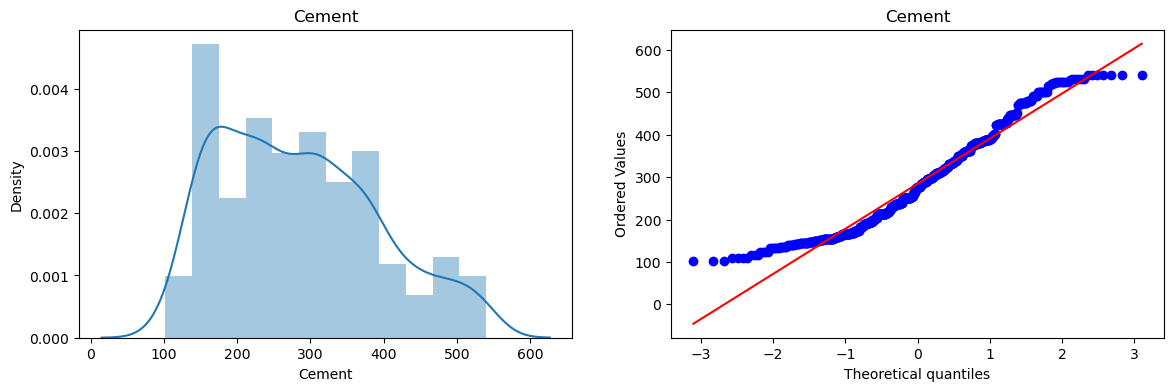

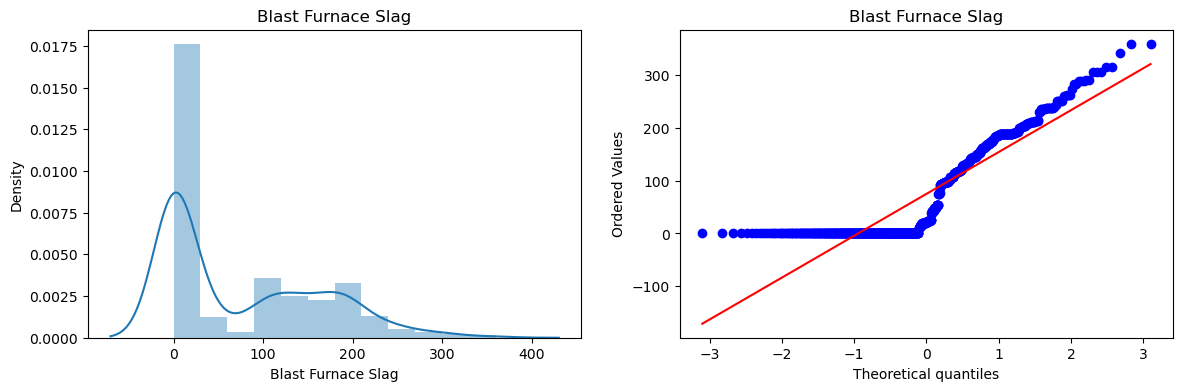

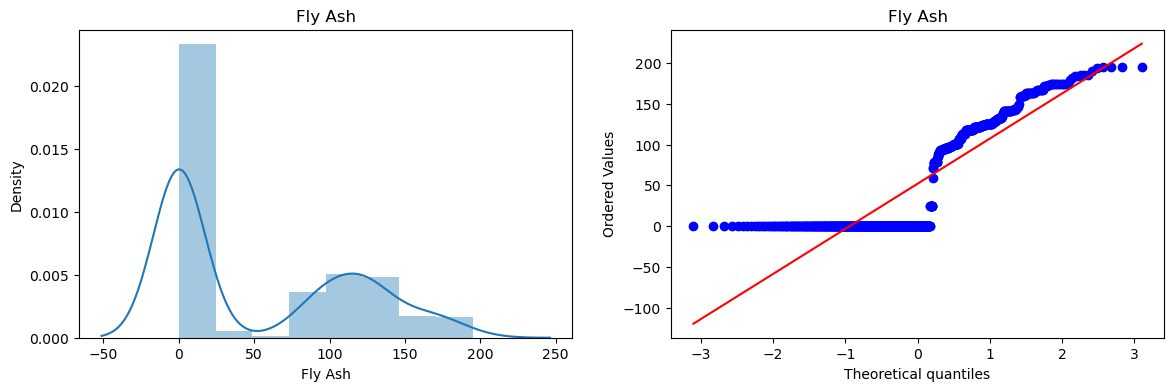

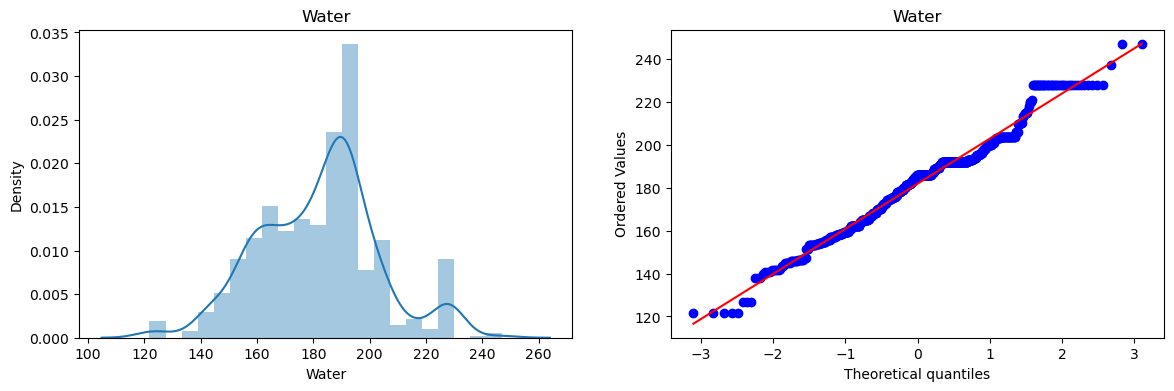

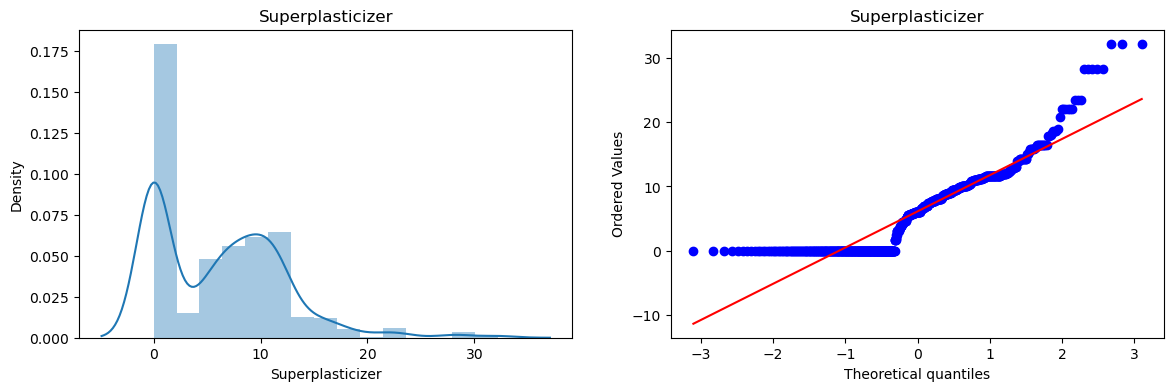

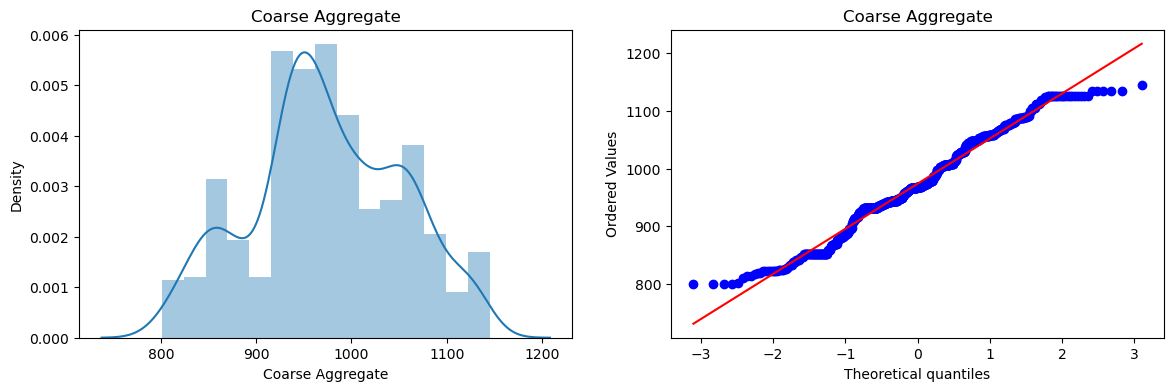

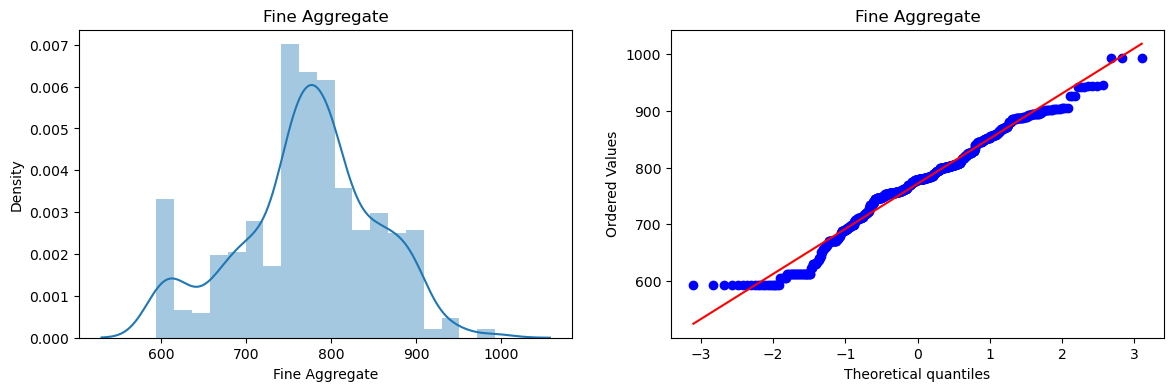

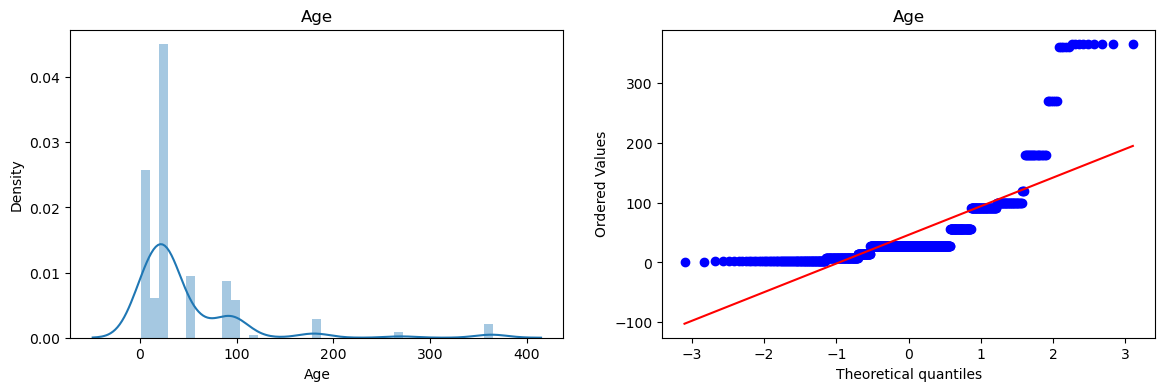

In [15]:
# Plotting the distplots without any transformation

for col in xtrain.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(xtrain[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(xtrain[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

In [17]:
# Applying Box-Cox Transform

pt = PowerTransformer(method='box-cox')

X_train_transformed = pt.fit_transform(xtrain+0.000001)
X_test_transformed = pt.transform(xtest+0.000001)

pd.DataFrame({'cols':xtrain.columns,'box_cox_lambdas':pt.lambdas_})

,cols,box_cox_lambdas
0,Cement,0.193476
1,Blast Furnace Slag,0.025753
2,Fly Ash,-0.045060
3,Water,0.853461
4,Superplasticizer,0.093053
5,Coarse Aggregate,1.040260
6,Fine Aggregate,1.890557
7,Age,0.071532


In [20]:
# Applying linear regression on transformed data



lr = LinearRegression()
lr.fit(X_train_transformed, ytrain)

y_pred2 = lr.predict(X_test_transformed)

r2_score(ytest, y_pred2)

0.7907293130754917

In [21]:
# Using cross val score

pt = PowerTransformer(method='box-cox')
X_transformed = pt.fit_transform(x+0.0000001)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed,y,scoring='r2'))

0.6658537942219862

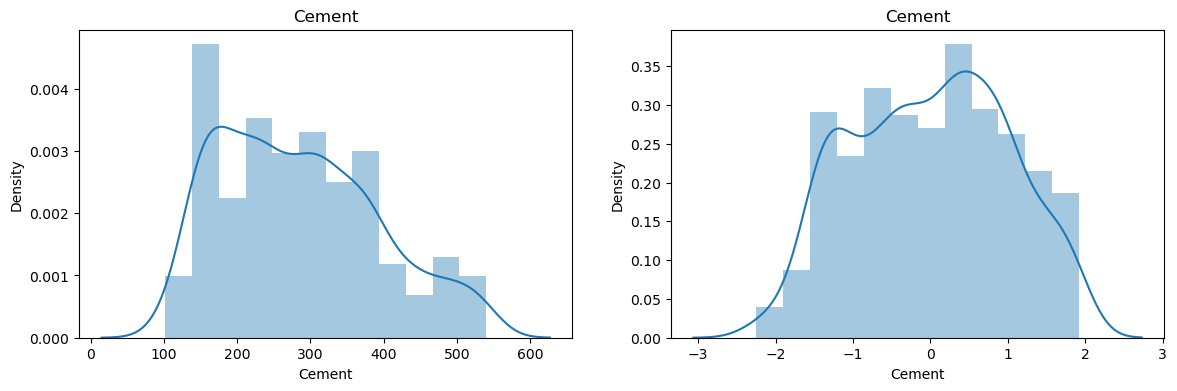

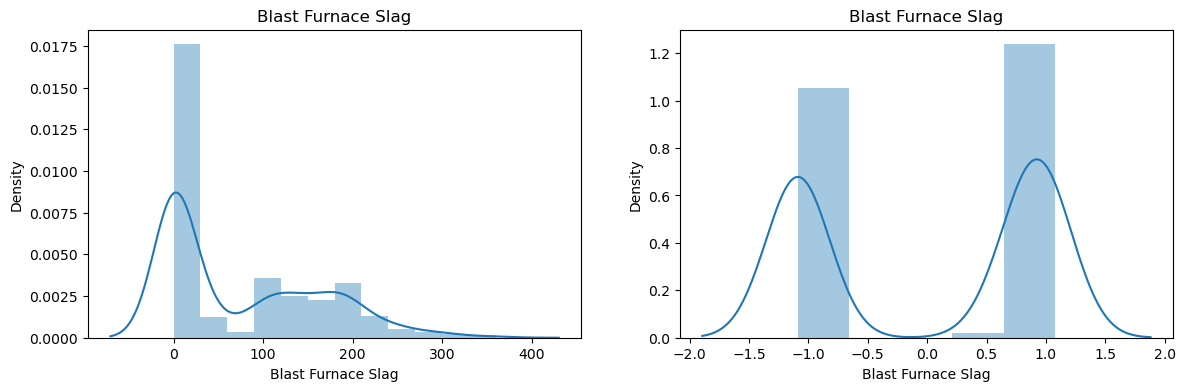

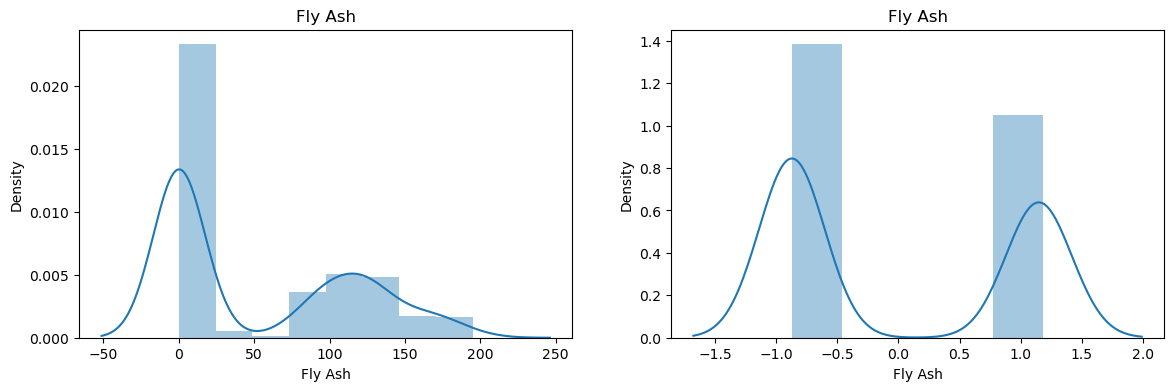

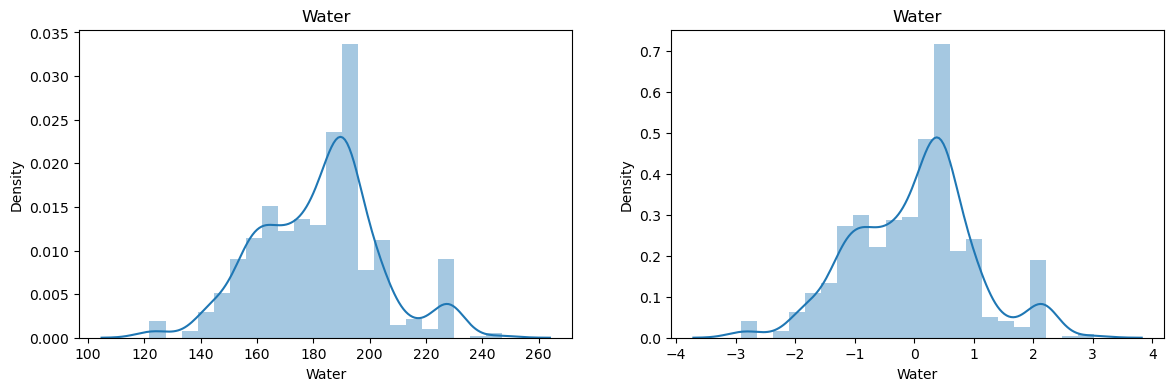

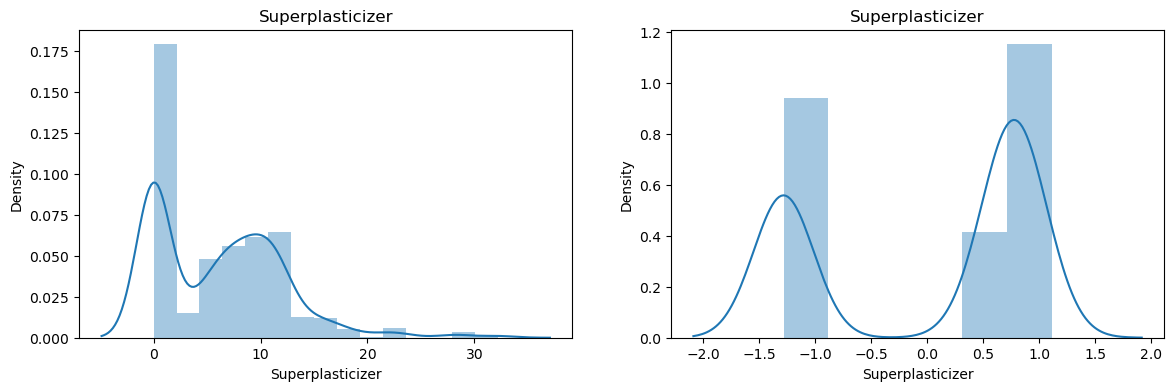

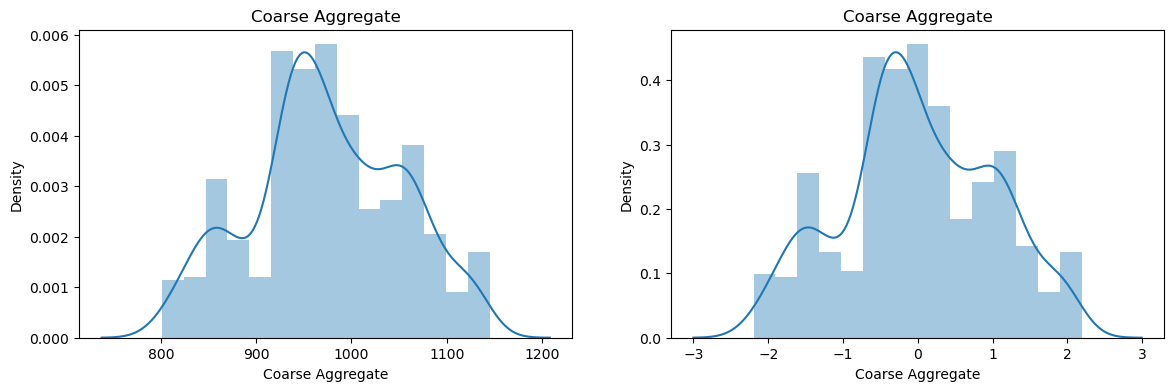

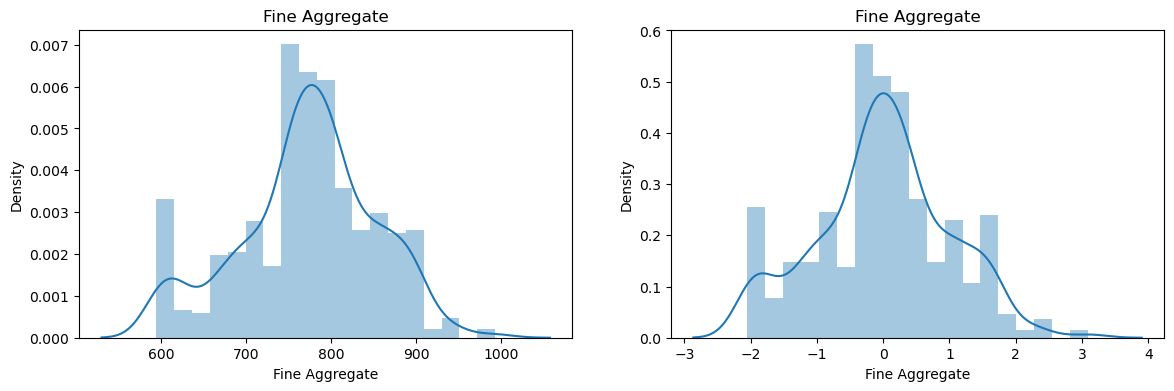

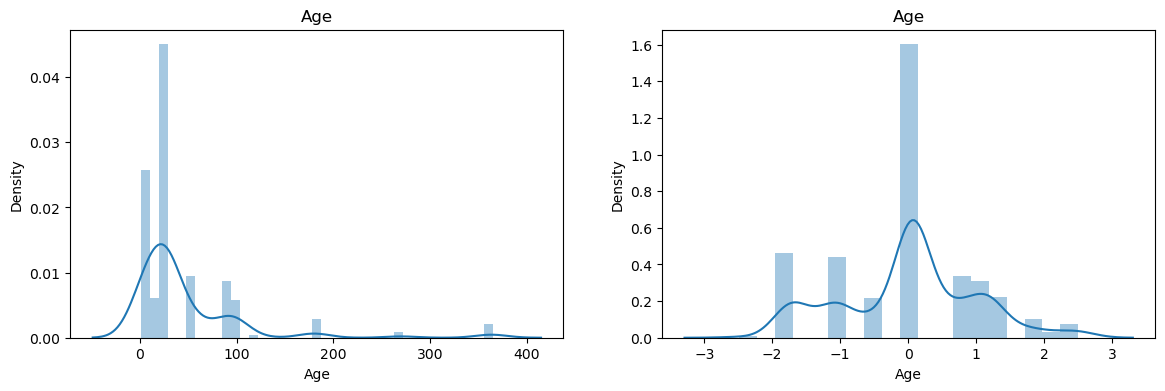

In [24]:
# Before and after comparision for Box-Cox Plot
X_train_transformed = pd.DataFrame(X_train_transformed,columns=xtrain.columns)

for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(xtrain[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(X_train_transformed[col])
    plt.title(col)

    plt.show()

In [26]:
# Apply Yeo-Johnson transform

pt1 = PowerTransformer()

X_train_transformed2 = pt1.fit_transform(xtrain)
X_test_transformed2 = pt1.transform(xtest)

lr = LinearRegression()
lr.fit(X_train_transformed2, ytrain)

y_pred3 = lr.predict(X_test_transformed2)

print(r2_score(ytest, y_pred3))

pd.DataFrame({'cols':xtrain.columns,'Yeo_Johnson_lambdas':pt1.lambdas_})

0.800634117559137


,cols,Yeo_Johnson_lambdas
0,Cement,0.190881
1,Blast Furnace Slag,0.015328
2,Fly Ash,-0.183831
3,Water,0.852513
4,Superplasticizer,0.226618
5,Coarse Aggregate,1.040395
6,Fine Aggregate,1.891786
7,Age,0.025134


In [27]:
# applying cross val score

pt = PowerTransformer()
X_transformed2 = pt.fit_transform(x)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed2,y,scoring='r2'))

0.6834625134285743

In [28]:
X_train_transformed2 = pd.DataFrame(X_train_transformed2,columns=xtrain.columns)

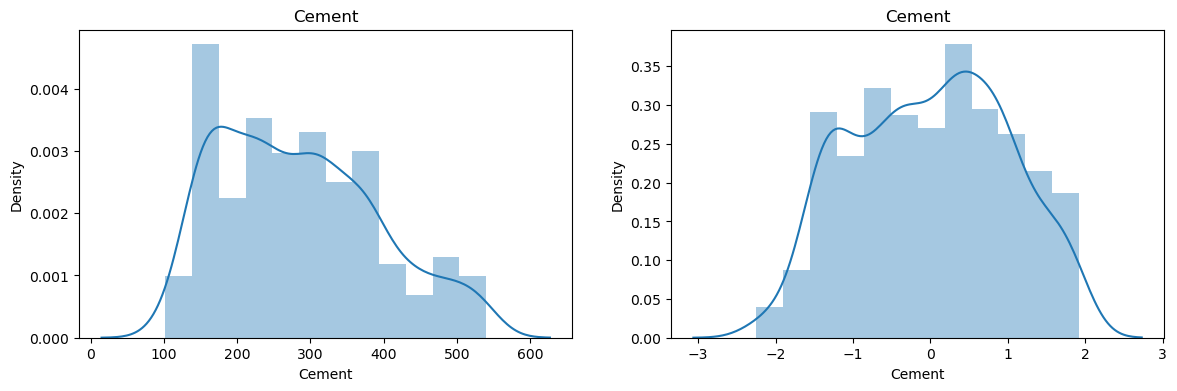

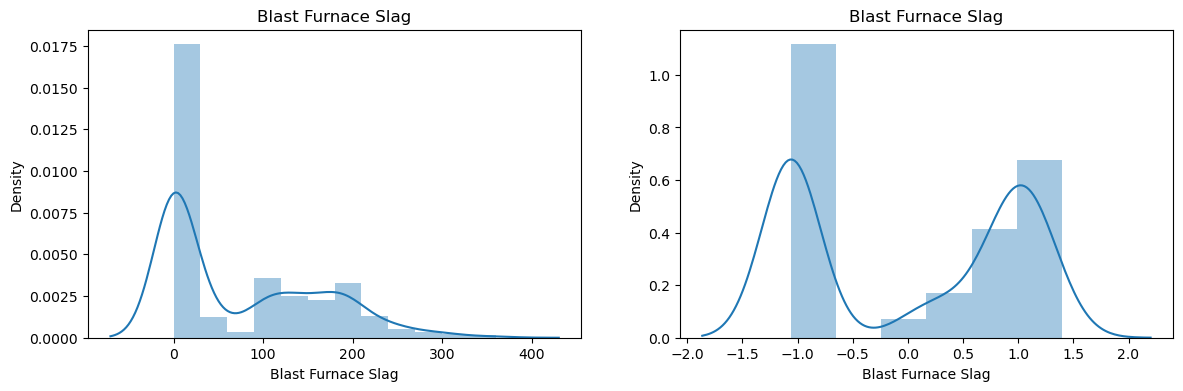

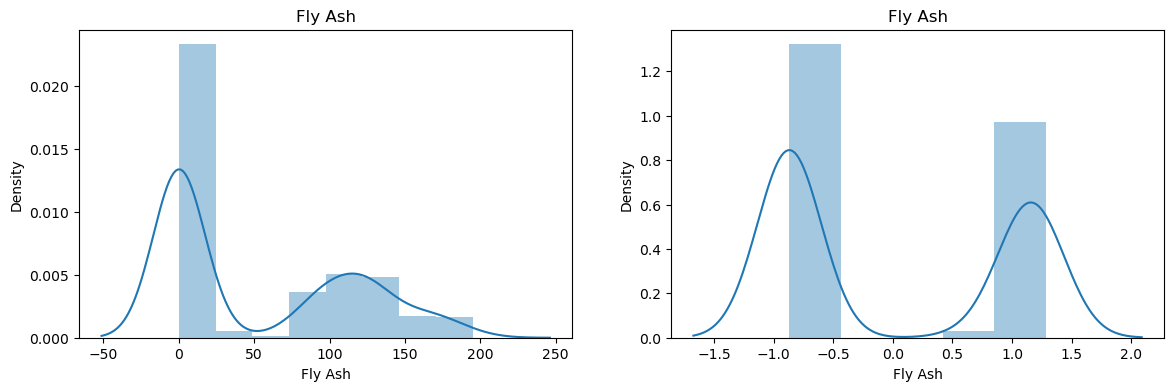

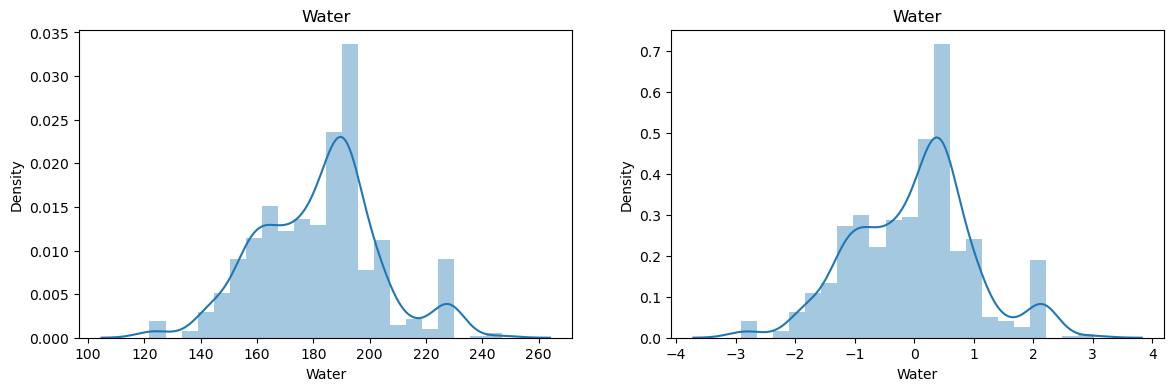

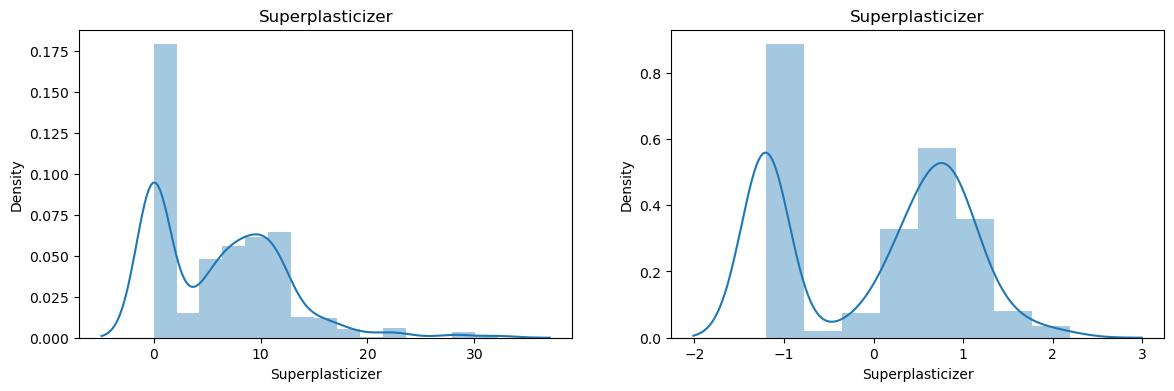

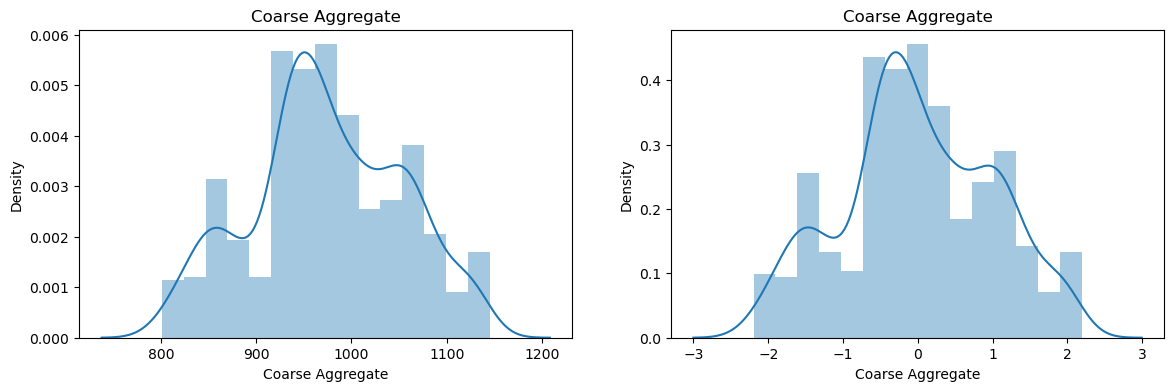

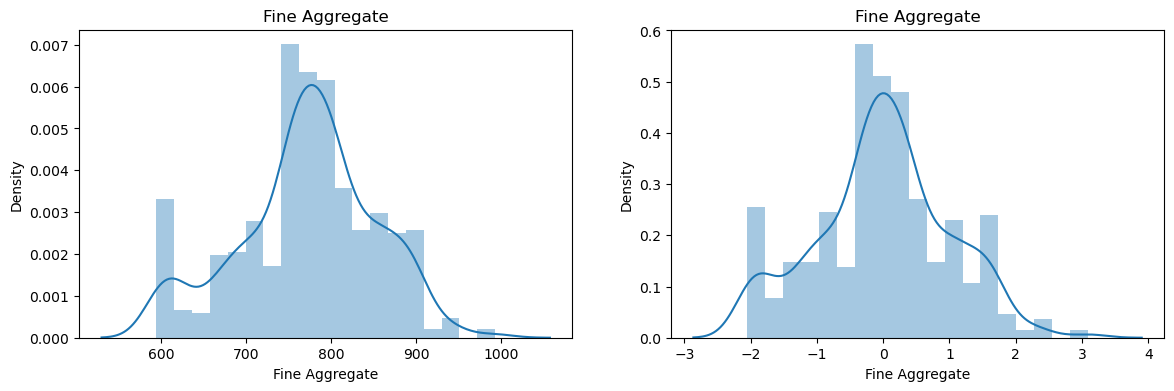

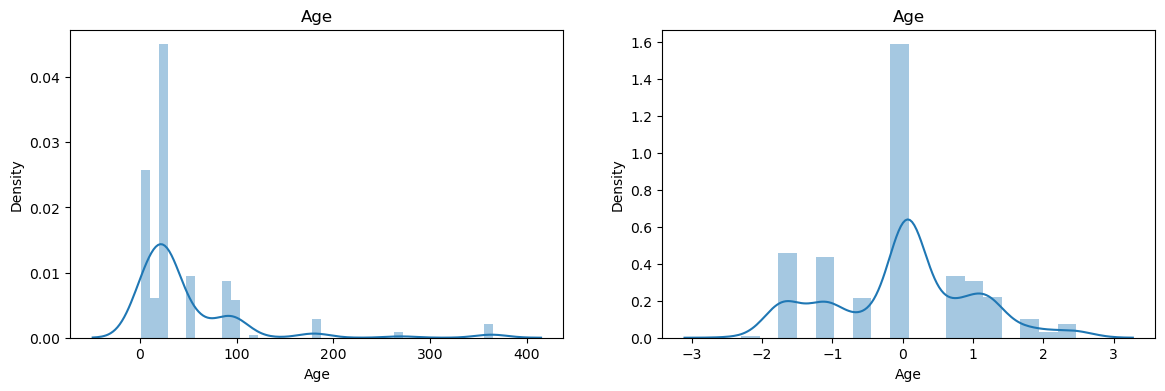

In [29]:
# Before and after comparision for Yeo-Johnson

for col in X_train_transformed2.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(xtrain[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(X_train_transformed2[col])
    plt.title(col)

    plt.show()

In [31]:
# Side by side Lambdas
pd.DataFrame({'cols':xtrain.columns,'box_cox_lambdas':pt.lambdas_,'Yeo_Johnson_lambdas':pt1.lambdas_})

,cols,box_cox_lambdas,Yeo_Johnson_lambdas
0,Cement,0.169544,0.190881
1,Blast Furnace Slag,0.016633,0.015328
2,Fly Ash,-0.136480,-0.183831
3,Water,0.808438,0.852513
4,Superplasticizer,0.264160,0.226618
5,Coarse Aggregate,1.129395,1.040395
6,Fine Aggregate,1.830763,1.891786
7,Age,0.001771,0.025134
